## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,  make_scorer, roc_auc_score, precision_score, recall_score, f1_score

## Prep Data

### Data Desciption

The data contains characteristics of institutions and state by year (2019-2023)

**UNITID**: (Quantitative) Unique identification number 

**INSTNM**: (Qualitative) institution name

**CITY**:   (Qualitative) city

**STABBR**: Institution's location - state

**ZIP**: (Quantitative) Zip code

**PREDDEG**: (Qualitative) predominant undergraduate award (undergraduate certificates, associate's degree, bachelor's degree, graduate degree)

**CONTROL**: (Qualitative) governance structure or type of institution (Public, Private Nonprofit, Private For-Profit)

**UGDS_WHITE**: (Quantitative) percentage of undergraduate students of those who identify as White

**UGDS_BLACK**: (Quantitative) percentage of undergraduate students of those who identify as Black

**UGDS_HISP**: (Quantitative) percentage of undergraduate students of those who identify as Hispanic

**UGDS_ASIAN**: (Quantitative) percentage of undergraduate students of those who identify as Asian

**UGDS_AIAN**: (Quantitative) percentage of undergraduate students of those who identify as American Indian and Alska Native

**UGDS_NHPI**: (Quantitative) percentage of undergraduate students of those who identify as Native Hawaiian and Pacific Islander

**UGDS_UNKN**: (Quantitative) percentage of undergraduate students of those who identify as unknown

**COSTT4_A**: (Quantitative) average cost of attendance for a full-time, first-time undergrad student at 4-year institution

**UGDS_MEN**: (Quantitative) percentage of undergraduate students that identify as male

**UGDS_WOMEN**: (Quantitative) percentage of undergraduate students that identify as female

**SCORECARD_SECTOR**: (Quantitative) percentage year

**ACADEMIC_YEAR**: (Qualitative) academic year

**COLI**: (Quantitative) Cost of Living Adjustment
 
**EMI**: (Quantitative) Enrollment Mix Adjustment

**HECA**: (Quantitative) Inflation Adjustment

**CPI**: (Quantitative) Inflation Adjustment

**Tot_State_Support**: (Quantitative) Total State Support

**Tot_State_Local_Support**: (Quantitative) Total State and Local Support

**Tot_Federal_Stimulus**: (Quantitative) Total Federal Stimulus

**Tot_State_Local_Support_Excl_Fed_Stim**: (Quantitative) Total State and Local Support Excluding Federal Stimulus

**Adj_State_Support**: (Quantitative) Adjustments to State Support

**RAM**: (Quantitative) Research - Agriculture - Medical

**Tot_Ind_Support**: (Quantitative) Total Independent Support

**Tot_Financial_Aid**: (Quantitative) Total Finanacial Aid

**Education_Appropriations**: (Quantitative) Education Appropriations

**Public_Fed_Stim**: (Quantitative) Public Federal Stimulus

**Ed_Appr_Excl_Fed_Stim**: (Quantitative) Education Appropriations Excluding Federal Stimulus

**Gen_Public_Ops**: (Quantitative) General Public Operations

**State_Public_Fin_Aid_Prcnt_Ed_Appr**: (Quantitative) State Public Financial Aid as a Percent of Education Appropriations

**Net_Tuition_Fee_Revenue**: (Quantitative) Net Tuition and Fee Revenue 

**Student_Share**: (Quantitative) Student Share

**Tot_Ed_Revenue**: (Quantitative) Total Education Revenue

**Tot_Ed_Rev_Excl_Fed_Stim**: (Quantitative) Total_Education Revenue Excluding Federal Stimulus

**Net_FTE_Enrollment**: (Quantitative) Net FTE Enrollment

**State_Tax_Appr**: (Quantitative) State Tax Appropriations

**Non_Tax_Support**: (Quantitative) Non-Tax Support

**Local_Appropriations**: (Quantitative) Local Appropriations

**Fed_Stim_Used_Fin_Aid**: (Quantitative) Federal Stimulus Used for Financial Aid

**Agency_Funding**: (Quantitative) Agency Funding

**Ind_Operating**: (Quantitative) Independent Operating

**Non_Credit**: (Quantitative) Non-Credit

**State_Public_Fin_Aid**: (Quantitative) State Public Financial Aid

**Ind_Fin_Aid**: (Quantitative) Independent Financial Aid

**Out_of_State_Fin_Aid**: (Quantitative) Out-of-State Financial Aid

**Agriculture_Extension_Appr**: (Quantitative) Agriculture and Extension Appropriations

**Hospital_Appr**: (Quantitative) Hospital Appropriations

**Medical_School_Appr**: (Quantitative) Medical School Appropriations

**Research_Appropriations**: (Quantitative) Research_Appropriations

**Gross_Tuition_Fee_Revenue**: (Quantitative) Gross Tuition and Fee Revenue

**Medical_Tuition_Fee_Revenue**: (Quantitative) Medical Tuition and Fee Revenue

**Inst_Discounts_Waivers**: (Quantitative) Institutional Discounts and Waivers

**Tuit_Fees_Used_Debt_Service**: (Quantitative) Tuition and Fees Used for Debt Service

**Gross_FTE_Enrollment**: (Quantitative) Gross FTE Enrollment

**Medical_FTE_Enrollment**: (Quantitative) Medical FTE Enrollment

**SGRNT_N**: (Quantitative)

**SGRNT_P**: (Quantitative)

**SGRNT_T**: (Quantitative)

**SGRNT_A**: (Quantitative)

**PCTFLOAN**: (Qualitative) percentage of all federal undergrads receiving a federal studen loan

**GRAD_DEBT_MDN**: (Quantitative) the median debt for students who have completed a degree or certificate program

We will use the variables **PCTFLOAN** and **GRAD_DEBT_MDN** in our modeling as response variables.

In [2]:
# # read in data
df = pd.read_csv('data/merged_scorecard_shef_and_ipeds.csv')

# get rid of PS (post-secondary)??
df['GRAD_DEBT_MDN'] = pd.to_numeric(df['GRAD_DEBT_MDN'], errors='coerce')

# filter out non-states from dataset: PR, VI, GU, PW, FM, AS, DC?
df_clean = df[~df['State'].isna()]                              # 31923

# remove PREDDEG = 0 or 4
pred_deg = [0,4]
df_clean = df_clean[~df_clean['PREDDEG'].isin(pred_deg)]        # 28159

# rename columns
column_rename = {
    'COLI (Cost of Living) Adjustment': 'COLI', 
    'EMI (Enrollment Mix) Adjustment': 'EMI',
    'HECA (Inflation) Adjustment': 'HECA', 
    'CPI (Inflation) Adjustment': 'CPI',
    'Total State Support': 'Tot_State_Support', 
    'Total State and Local Support': 'Tot_State_Local_Support',
    'Total Federal Stimulus': 'Tot_Federal_Stimulus',
    'Total State and Local Support Excluding Federal Stimulus': 'Tot_State_Local_Support_Excl_Fed_Stim',
    'Adjustments to State Support': 'Adj_State_Support',
    'Research - Agriculture - Medical (RAM)': 'RAM', 
    'Total Independent Support': 'Tot_Ind_Support',
    'Total Financial Aid': 'Tot_Financial_Aid', 
    'Education Appropriations': 'Education_Appropriations',
    'Public Federal Stimulus': 'Public_Fed_Stim',
    'Education Appropriations Excluding Federal Stimulus': 'Ed_Appr_Excl_Fed_Stim',
    'General Public Operations': 'Gen_Public_Ops',
    'State Public Financial Aid as a Percent of Education Appropriations': 'State_Public_Fin_Aid_Prcnt_Ed_Appr',
    'Net Tuition and Fee Revenue': 'Net_Tuition_Fee_Revenue', 
    'Student Share': 'Student_Share',
    'Total Education Revenue': 'Tot_Ed_Revenue',
    'Total Education Revenue Excluding Federal Stimulus': 'Tot_Ed_Rev_Excl_Fed_Stim',
    'Net FTE Enrollment': 'Net_FTE_Enrollment', 
    'State Tax Appropriations': 'State_Tax_Appr', 
    'Non-Tax Support': 'Non_Tax_Support',
    'Local Appropriations': 'Local_Appropriations', 
    'Federal Stimulus Used for Financial Aid': 'Fed_Stim_Used_Fin_Aid',
    'Agency Funding': 'Agency_Funding', 
    'Independent Operating': 'Ind_Operating', 
    'Non-Credit': 'Non_Credit',
    'State Public Financial Aid': 'State_Public_Fin_Aid', 
    'Independent Financial Aid': 'Ind_Fin_Aid',
    'Out-of-State Financial Aid': 'Out_of_State_Fin_Aid',
    'Agriculture and Extension Appropriations': 'Agriculture_Extension_Appr', 
    'Hospital Appropriations': 'Hospital_Appr',
    'Medical School Appropriations': 'Medical_School_Appr', 
    'Research Appropriations': 'Research_Appropriations',
    'Gross Tuition and Fee Revenue': 'Gross_Tuition_Fee_Revenue', 
    'Medical Tuition and Fee Revenue': 'Medical_Tuition_Fee_Revenue',
    'Institutional Discounts and Waivers': 'Inst_Discounts_Waivers',
    'Tuition and Fees Used for Debt Service': 'Tuit_Fees_Used_Debt_Service', 
    'Gross FTE Enrollment': 'Gross_FTE_Enrollment',
    'Medical FTE Enrollment': 'Medical_FTE_Enrollment'
}
df_clean = df_clean.rename(columns=column_rename)

# move columns for simplicity
new_order = ['UNITID', 'INSTNM', 'FY', 'State', 'CITY', 'ZIP', 'PREDDEG', 'CONTROL',
       'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_UNKN', 'COSTT4_A',
       'UGDS_MEN', 'UGDS_WOMEN', 'SCORECARD_SECTOR', 'COLI',
       'EMI', 'HECA', 'CPI', 'Tot_State_Support', 'Tot_State_Local_Support',
       'Tot_Federal_Stimulus', 'Tot_State_Local_Support_Excl_Fed_Stim',
       'Adj_State_Support', 'RAM', 'Tot_Ind_Support', 'Tot_Financial_Aid',
       'Education_Appropriations', 'Public_Fed_Stim', 'Ed_Appr_Excl_Fed_Stim',
       'Gen_Public_Ops', 'State_Public_Fin_Aid_Prcnt_Ed_Appr',
       'Net_Tuition_Fee_Revenue', 'Student_Share', 'Tot_Ed_Revenue',
       'Tot_Ed_Rev_Excl_Fed_Stim', 'Net_FTE_Enrollment', 'State_Tax_Appr',
       'Non_Tax_Support', 'Local_Appropriations', 'Fed_Stim_Used_Fin_Aid',
       'Agency_Funding', 'Ind_Operating', 'Non_Credit', 'State_Public_Fin_Aid',
       'Ind_Fin_Aid', 'Out_of_State_Fin_Aid', 'Agriculture_Extension_Appr',
       'Hospital_Appr', 'Medical_School_Appr', 'Research_Appropriations',
       'Gross_Tuition_Fee_Revenue', 'Medical_Tuition_Fee_Revenue',
       'Inst_Discounts_Waivers', 'Tuit_Fees_Used_Debt_Service',
       'Gross_FTE_Enrollment', 'Medical_FTE_Enrollment', 'SGRNT_N', 'SGRNT_P', 
       'SGRNT_T', 'SGRNT_A', 'PCTFLOAN', 'GRAD_DEBT_MDN']
df_clean = df_clean[new_order]

# set up categorical columns
df_clean['INSTNM'] = df_clean['INSTNM'].astype('category')
df_clean['State'] = df_clean['State'].astype('category')
df_clean['CITY'] = df_clean['CITY'].astype('category')
df_clean['FY'] = df_clean['FY'].astype(int).astype('category')
df_clean['PREDDEG'] = df_clean['PREDDEG'].astype('category')
df_clean['CONTROL'] = df_clean['CONTROL'].astype('category')
df_clean['SCORECARD_SECTOR'] = df_clean['SCORECARD_SECTOR'].astype('category')

# dataframe info
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28159 entries, 0 to 32325
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   UNITID                                 28159 non-null  int64   
 1   INSTNM                                 28159 non-null  category
 2   FY                                     28159 non-null  category
 3   State                                  28159 non-null  category
 4   CITY                                   28159 non-null  category
 5   ZIP                                    28159 non-null  object  
 6   PREDDEG                                28159 non-null  category
 7   CONTROL                                28159 non-null  category
 8   UGDS_WHITE                             28149 non-null  float64 
 9   UGDS_BLACK                             28149 non-null  float64 
 10  UGDS_HISP                              28149 non-null  float64 

/var/folders/y0/6_l3s2r147zb5njrsxhlx0b40000gn/T/ipykernel_92736/3471273233.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/merged_scorecard_shef_and_ipeds.csv')


## EDA

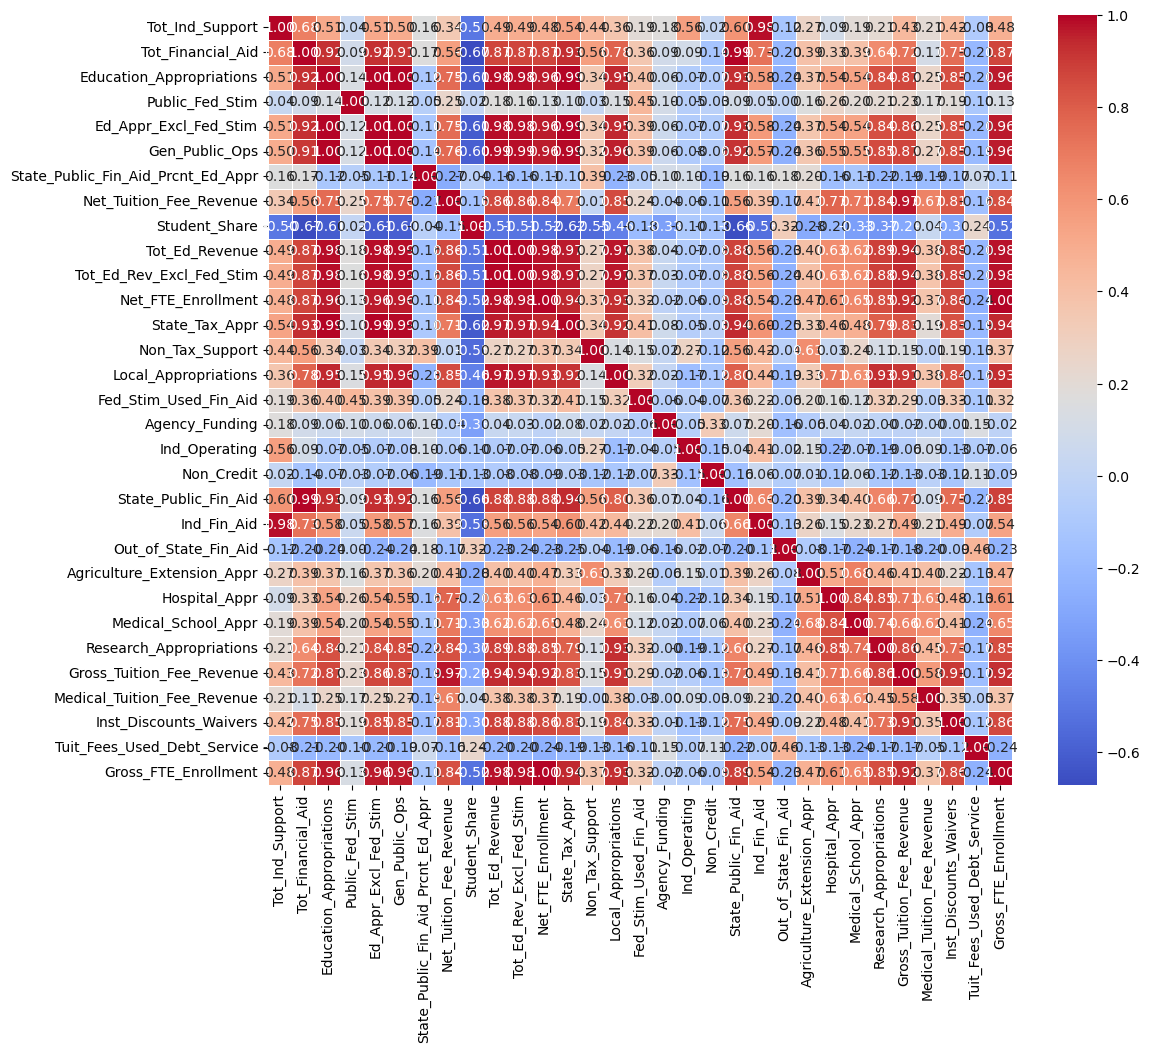

In [3]:
#Correlation Plot for numerical data
numerical_df = df_clean.iloc[:,29:60]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
## Additional Bar Plots